In [1]:
filename='powerplay.wav' 
import librosa 
x, sr = librosa.load(filename,sr=16000)

In [2]:
int(librosa.get_duration(x, sr)/60)

23

In [3]:
max_slice=5 
window_length = max_slice * sr

In [4]:
import IPython.display as ipd 
a=x[21*window_length:22*window_length] 
ipd.Audio(a, rate=sr)

In [5]:
energy = sum(abs(a**2))
print(energy)

15143.855322004258


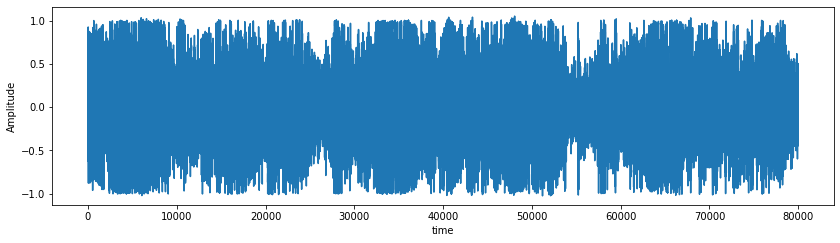

In [9]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(14, 8)) 
ax1 = fig.add_subplot(211) 
ax1.set_xlabel('time') 
ax1.set_ylabel('Amplitude') 
ax1.plot(a)

In [10]:
import numpy as np
energy = np.array([sum(abs(x[i:i+window_length]**2)) for i in range(0, len(x), window_length)])

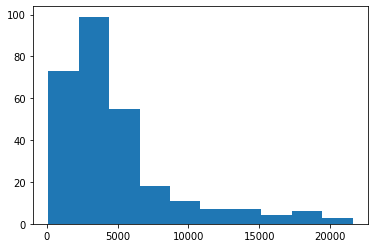

In [11]:
import matplotlib.pyplot as plt 
plt.hist(energy) 
plt.show()

In [12]:
import pandas as pd
df=pd.DataFrame(columns=['energy','start','end'])
thresh=12000
row_index=0
for i in range(len(energy)):
  value=energy[i]
  if(value>=thresh):
    i=np.where(energy == value)[0]
    df.loc[row_index,'energy']=value
    df.loc[row_index,'start']=i[0] * 5
    df.loc[row_index,'end']=(i[0]+1) * 5
    row_index= row_index + 1

In [13]:
temp=[]
i=0
j=0
n=len(df) - 2
m=len(df) - 1
while(i<=n):
  j=i+1
  while(j<=m):
    if(df['end'][i] == df['start'][j]):
      df.loc[i,'end'] = df.loc[j,'end']
      temp.append(j)
      j=j+1
    else:
      i=j
      break  
df.drop(temp,axis=0,inplace=True)

In [14]:
df

,energy,start,end
0,14132.599375,90,120
6,14760.214182,875,890
9,17609.976938,945,950
10,18395.460123,1170,1180
12,17148.793515,1220,1230
14,15185.961212,1235,1245
16,17843.665083,1255,1270
19,12296.495431,1325,1330
20,15736.056741,1400,1410


In [15]:
pip install moviepy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sroy8\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [16]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
start=np.array(df['start'])
end=np.array(df['end'])
for i in range(len(df)):
 if(i!=0):
  start_lim = start[i] - 5
 else:
  start_lim = start[i] 
 end_lim   = end[i]   
 filename="highlight" + str(i+1) + ".mp4"
 ffmpeg_extract_subclip("powerplay.mp4",start_lim,end_lim,targetname=filename)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
